In [442]:
import pandas as pd
import numpy as np
import os
import sys
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
sys.path.append('D:/Projects/Orpheus_ai/DataSet/Latents')

In [462]:
encoding_hot_class_Y = np.load('D:/Projects/Orpheus_ai/DataSet/Latents/encoded_hot_classes(Y).npz')
encoding_hot_class_X = np.load('D:/Projects/Orpheus_ai/DataSet/Latents/encoded_instrumental(X).npz')
# encoding_hot_class_X = np.load('D:/Projects/Orpheus_ai/DataSet/Latents/latent_X.npz')

In [463]:
Y = encoding_hot_class_Y['arr_0']
classes = np.argmax(Y,axis=-1)
X = encoding_hot_class_X['arr_0']

In [464]:
# ## Train a Keras classifier with one hidden layer
# from keras.models import Sequential, Model
# from keras.layers import *
# from keras.optimizers import RMSprop
# from keras.utils import to_categorical

# input = Input(shape=(encoding_hot_class_X['arr_0'].shape[1],))
# x = Dense(512, activation='relu')(input)
# x = Dense(256, activation='relu')(x)
# x = Dense(128, activation='relu')(x)
# output = Dense(encoding_hot_class_Y['arr_0'].shape[1], activation='softmax')(x)

# model = Model(inputs=input, outputs=output)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ## Train the model
# model.fit(X,Y,epochs=10, batch_size=32, validation_split=0.2)

# latent_creation_model = Model(inputs=input, outputs=x)

# ## Get the latent representation
# X  = latent_creation_model.predict(X)

In [465]:
## Select the top 5 classes from Y by frequency
unique, counts = np.unique(classes, return_counts=True)
class_freq = dict(zip(unique, counts))
sorted_class_freq = sorted(class_freq.items(), key=lambda x: x[1], reverse=True)
top_classes = [x[0] for x in np.array(sorted_class_freq)[[4,12,6]]]

## Select the X and Y if Y is in top_classes
X_top = []
Y_top = []
for i in range(len(classes)):
    if classes[i] in top_classes:
        X_top.append(X[i])
        Y_top.append(Y[i])

X_top = np.array(X_top)
Y_top = np.array(Y_top)
Y_top = np.argmax(Y_top,axis=-1)



In [466]:
## PCA on X
pca = PCA(n_components=2)
pca.fit(X_top)
X_pca = pca.transform(X_top)


In [467]:
## LDA on X_pca
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_top, Y_top)
X_lda = lda.transform(X_top)


In [468]:
# ## Get the distance matrix of X_top

# from scipy.spatial import distance_matrix
# dist_mat = distance_matrix(X_top, X_top)

# ## Perform MDS on dist_mat
# from sklearn.manifold import MDS
# mds = MDS(n_components=2, dissimilarity='precomputed')
# X_mds = mds.fit_transform(dist_mat)



In [469]:
Y_top = np.array(Y_top, dtype=str)
for i,j in zip(set(Y_top),['red','blue','green','yellow','black','orange','purple','pink','brown','gray','cyan','magenta']):
    Y_top[Y_top==i] = j

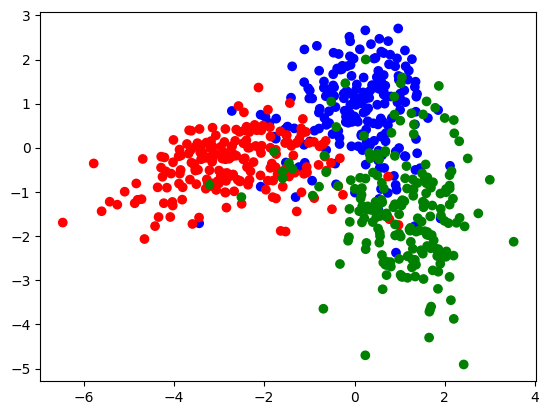

In [472]:
## Add a scatter plot of X_lda and color points by classes and make classes categorical
## Replace Y_top with color name
# import matplotlib.pyplot as plt
# plt.scatter(X_lda[:,0], X_lda[:,1], c=Y_top)
# plt.show()

# Plot 100 points from each class
for i in set(Y_top):
    plt.scatter(X_lda[Y_top==str(i)][:,0][:200], X_lda[Y_top==str(i)][:,1][:200], c=Y_top[Y_top==str(i)][:200])
plt.show()


In [381]:
## Merge the 200 points and class into a dataframe
X_lda_df = pd.DataFrame(X_lda, columns=['x','y'])
Y_top_df = pd.DataFrame(Y_top, columns=['class'])
df = pd.concat([X_lda_df, Y_top_df], axis=1)
df['class'].replace({'red':'folk', 'blue':'classical', 'green':'pop'}, inplace=True)

## Plot the scatter plot of X_lda_df and color points by classes

In [382]:
## Calculate the distance of all points from the centroid of each class
## Calculate the distance of all points from the centroid of each class
from scipy.spatial import distance
centroid = df.groupby('class').mean()

## Calculate the distance of all points from the centroid of each class
dist = []
for i in range(len(df)):
    dist.append(distance.euclidean(df.iloc[i,:2], centroid.loc[df.iloc[i,2]]))

df['dist'] = dist
df['dist'] = np.log(np.log(df['dist']+1)+1)
df['dist'] = 1/df['dist']


In [402]:
## Plot a scatter chart with plotly; Make the marker stylized and 
import plotly.express as px
fig = px.scatter(df, x='x', y='y', color='class', hover_data=['class'], size='dist', opacity=0.5)
## Make a square shaped plot
fig.update_layout(
    template='plotly_white',
    autosize=False,
    width=1200,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    # paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker=dict(line=dict(width=0.5,
                                            color='DarkSlateGrey')),
                    selector=dict(mode='markers'))


fig.show()



### Reduce by clustering

In [155]:
X_reduced, Y_reduced = select_points_maximize_intercluster_distance(X_lda, Y_top)

<ipython-input-154-8bf472d7eb02>:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  cluster_indices = np.where(Y == cluster_label)[0]


In [156]:
X_reduced

[]

In [157]:
Y_reduced

[]